# Relação de variáveis quantitativas.

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
#abrindo o arquivo no diretório
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
print(sinasc.drop_duplicates().shape)
sinasc.columns

(6876, 69)
(6876, 69)


Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [3]:
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5.0,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5.0,2.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5.0,3.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4.0,4.0,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5.0,5.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [5]:
# retirando as varíaveis de interesse da base de dados apgar5,gestacao,peso,sexo.
df = sinasc[['GESTACAO','PESO','SEXO','APGAR5']]
print(df.head())
df.isna().sum().sum()

          GESTACAO  PESO       SEXO  APGAR5
0  37 a 41 semanas  3685  Masculino    10.0
1  37 a 41 semanas  3055   Feminino     9.0
2  37 a 41 semanas  3460   Feminino    10.0
3  37 a 41 semanas  2982   Feminino    10.0
4  37 a 41 semanas  3310   Feminino    10.0


358

In [6]:
#tratando rapidamente para melhor qualidade nos gráficos.
df.dropna(subset=['APGAR5','GESTACAO','PESO','SEXO'],inplace=True)
print(f'dados faltantes após limpeza :',df.isna().sum().sum())

dados faltantes após limpeza : 0


<ipython-input-6-8890aeed20ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['APGAR5','GESTACAO','PESO','SEXO'],inplace=True)


In [7]:
df.shape

(6519, 4)

In [8]:
#categorizando variável apgar5
df.loc[(df['APGAR5'] >=0) & (df['APGAR5'] <=3),'SCORE_ASFIXIA'] = 'ASFIXIA_GRAVE'
df.loc[(df['APGAR5'] >=4) & (df['APGAR5'] <=5),'SCORE_ASFIXIA'] = 'ASFIXIA_MODERADA'
df.loc[(df['APGAR5'] >=6) & (df['APGAR5'] <=7),'SCORE_ASFIXIA'] = 'ASFIXIA_LEVE'
df.loc[(df['APGAR5'] >=8) & (df['APGAR5'] <=10),'SCORE_ASFIXIA'] = 'ASFIXIA_NORMAL'
df

<ipython-input-8-0ddb0a00d87f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['APGAR5'] >=0) & (df['APGAR5'] <=3),'SCORE_ASFIXIA'] = 'ASFIXIA_GRAVE'


,GESTACAO,PESO,SEXO,APGAR5,SCORE_ASFIXIA
0,37 a 41 semanas,3685,Masculino,10.0,ASFIXIA_NORMAL
1,37 a 41 semanas,3055,Feminino,9.0,ASFIXIA_NORMAL
2,37 a 41 semanas,3460,Feminino,10.0,ASFIXIA_NORMAL
3,37 a 41 semanas,2982,Feminino,10.0,ASFIXIA_NORMAL
4,37 a 41 semanas,3310,Feminino,10.0,ASFIXIA_NORMAL
...,...,...,...,...,...
6871,37 a 41 semanas,2860,Feminino,9.0,ASFIXIA_NORMAL
6872,37 a 41 semanas,4015,Masculino,8.0,ASFIXIA_NORMAL
6873,37 a 41 semanas,2510,Masculino,10.0,ASFIXIA_NORMAL
6874,37 a 41 semanas,3330,Masculino,10.0,ASFIXIA_NORMAL


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

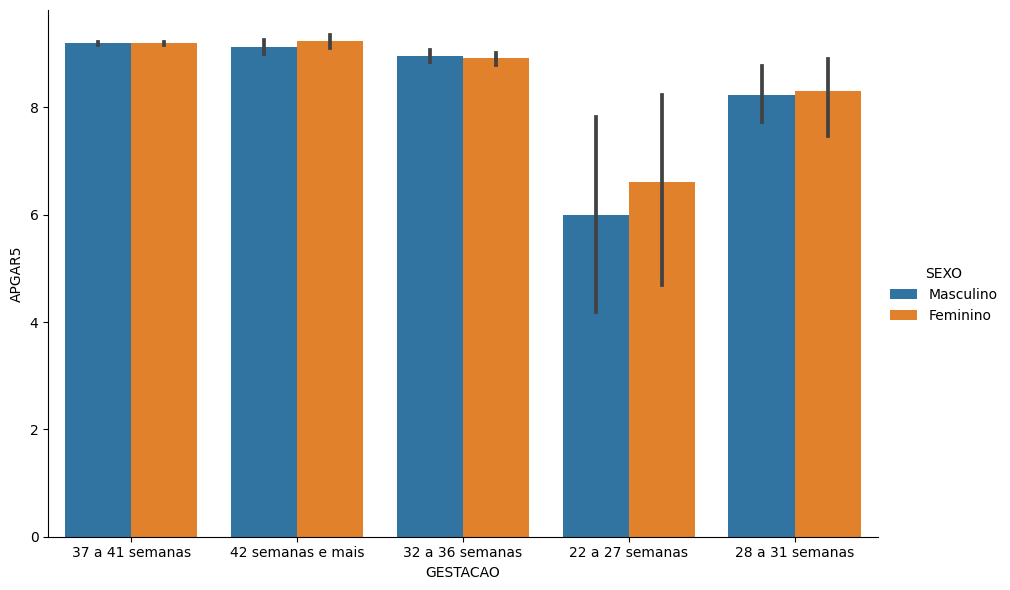

In [21]:
# relizando gráfico da média do score apgar5 por sexo do rn , em torno da gestação
sns.catplot(x='GESTACAO',y='APGAR5',hue='SEXO',kind='bar',height=6,aspect=1.5,data=df)

In [46]:
plt.close('all')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [22]:
#montando tabela cruzada
tab_apg_ges = pd.crosstab(df['GESTACAO'],df['APGAR5'])
tab_apg_ges

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,3,0,1,2,1,0,1,3,5,7,1
28 a 31 semanas,0,0,1,0,0,1,3,1,11,21,3
32 a 36 semanas,1,0,0,1,3,4,3,13,92,342,137
37 a 41 semanas,0,13,1,2,1,7,19,36,353,3484,1744
42 semanas e mais,0,0,0,0,0,0,0,2,18,122,56


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [23]:
percent_apg_gest = tab_apg_ges.div(tab_apg_ges.sum(axis=1),axis=0)
percent_apg_gest.round(2)

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.12,0.0,0.04,0.08,0.04,0.00,0.04,0.12,0.21,0.29,0.04
28 a 31 semanas,0.00,0.0,0.02,0.00,0.00,0.02,0.07,0.02,0.27,0.51,0.07
32 a 36 semanas,0.00,0.0,0.00,0.00,0.01,0.01,0.01,0.02,0.15,0.57,0.23
37 a 41 semanas,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.01,0.06,0.62,0.31
42 semanas e mais,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.01,0.09,0.62,0.28


In [24]:
#conferindo o percentual
percent_apg_gest.sum(axis=1)

GESTACAO
22 a 27 semanas      1.0
28 a 31 semanas      1.0
32 a 36 semanas      1.0
37 a 41 semanas      1.0
42 semanas e mais    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: title={'center': 'FRENQUÊNCIA DO SCORE APGAR5 NO TEMPO GESTACIONAL'}, xlabel='tempo gestacional', ylabel='frequência'>

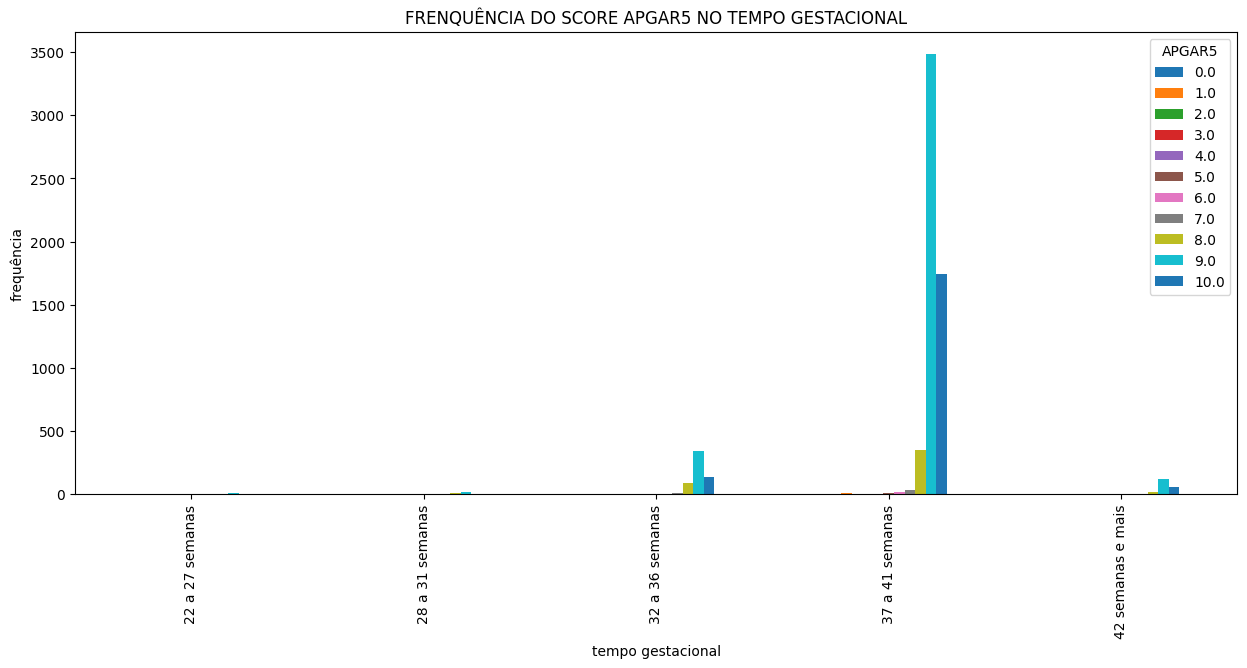

In [25]:
# realizando gráfico da tabela cruzada, é notavel que independente do apgar há uma maior concentração de nascimentos a partir da 37 semana, corroborando com afirmação médica.
tab_apg_ges.plot.bar(figsize=(15, 6),title='FRENQUÊNCIA DO SCORE APGAR5 NO TEMPO GESTACIONAL',ylabel='frequência',xlabel='tempo gestacional')

In [45]:
plt.close('all')

<Axes: xlabel='GESTACAO', ylabel='count'>

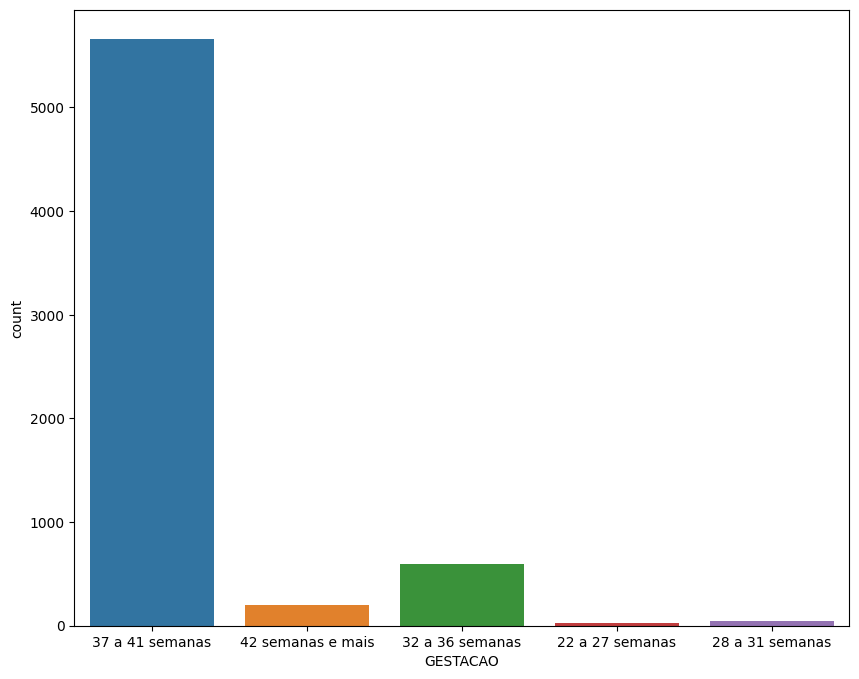

In [39]:
# realizando uma contagem de frequência para verificar por outro ângulo a maior frequência corroborando para oque os médicos dizem sobre prematuridade.
plt.rc('figure',figsize=(10,8))
fig, axes = plt.subplots()

sns.countplot(ax= axes ,x='GESTACAO',data=df)

In [44]:
plt.close('all')

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

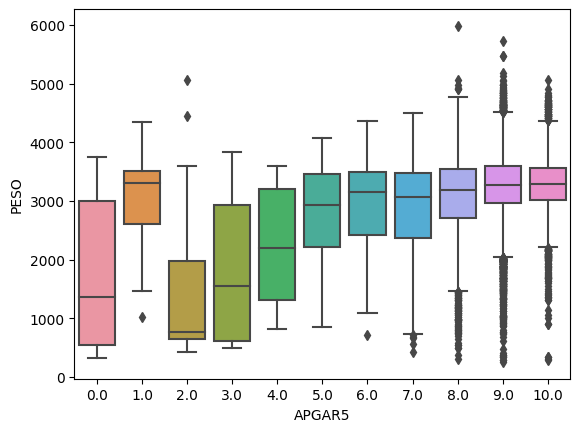

In [ ]:
# VERIFICANDO A RELAÇÃO ENTRE SCORE APGAR E PESO DO RN. NO BOXPLOT É notável que quanto menor o escore parece haver uma relação de baixo peso.
sns.boxplot(data=df, x=df['APGAR5'],y='PESO')

In [43]:
plt.close('all')

<ipython-input-60-b72d0e3c5e55>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a = sns.catplot(data = df, x='APGAR5',y='PESO',estimator='median',kind='bar',ci=None,height=4.0,aspect=3)


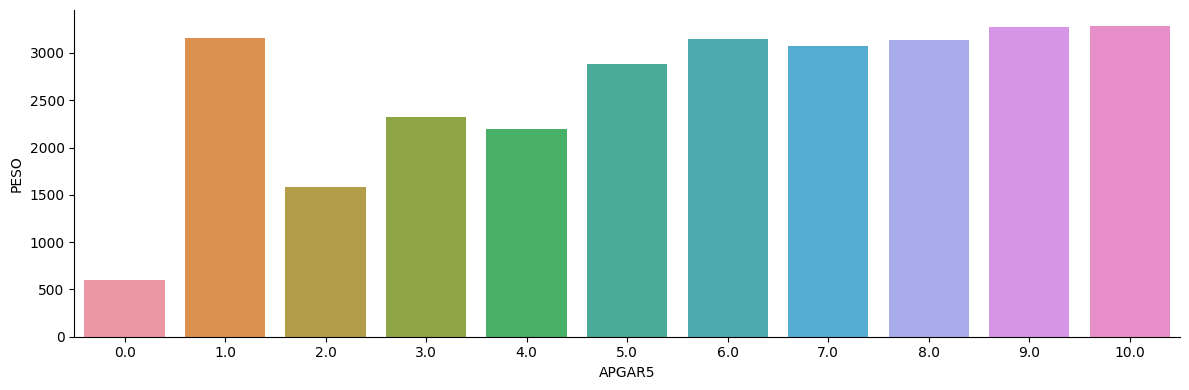

In [60]:
#verificando por outras alternativas

a = sns.catplot(data = df, x='APGAR5',y='PESO',estimator='median',kind='bar',ci=None,height=4.0,aspect=3)